<a href="https://colab.research.google.com/github/aryanjha256/randomjupyternotebooks/blob/main/Silhouette_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# Genrating the sample data
# This particular setting has one disctint ckuster and 3 clusters p1 together.

X, y = make_blobs(
    n_samples= 500,
    n_features = 2,
    centers = 4,
    cluster_std = 1,
    center_box = (-10.0, 10.0),
    shuffle  = True,
    random_state = 1
) # For reproducibility



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =  2 The average silhouette_score is 0.7049787496083262
For n_clusters =  3 The average silhouette_score is 0.5882004012129721
For n_clusters =  4 The average silhouette_score is 0.6505186632729437
For n_clusters =  5 The average silhouette_score is 0.56376469026194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters =  6 The average silhouette_score is 0.4504666294372765


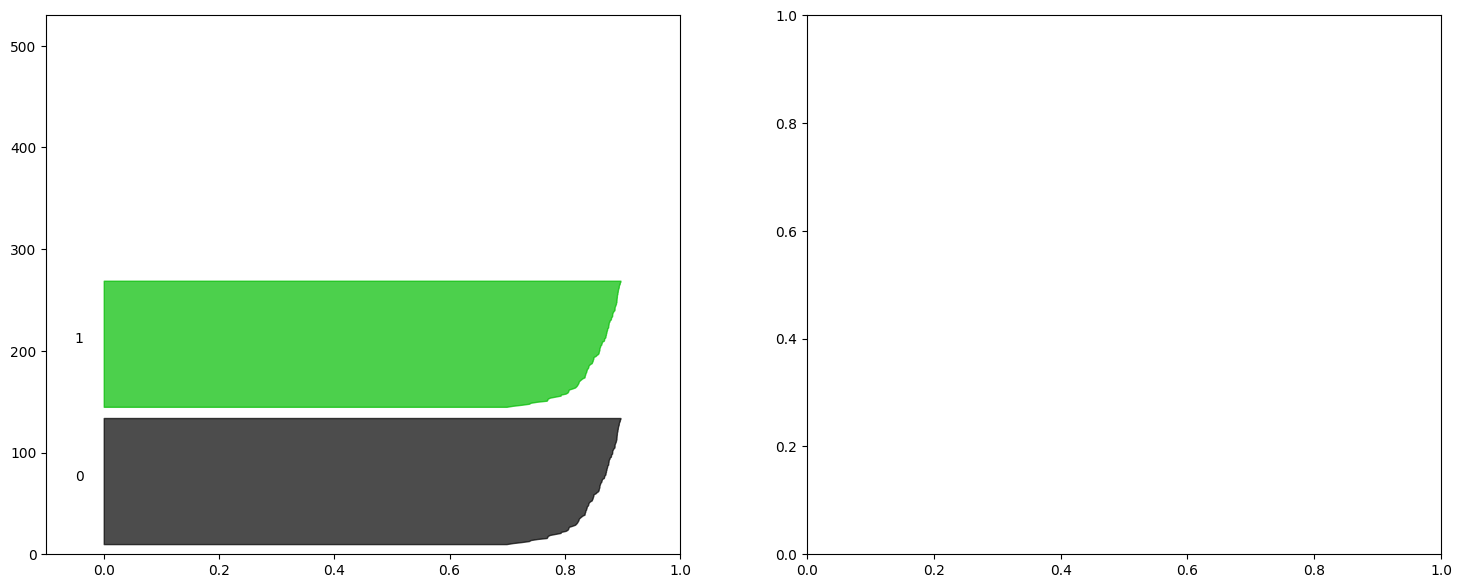

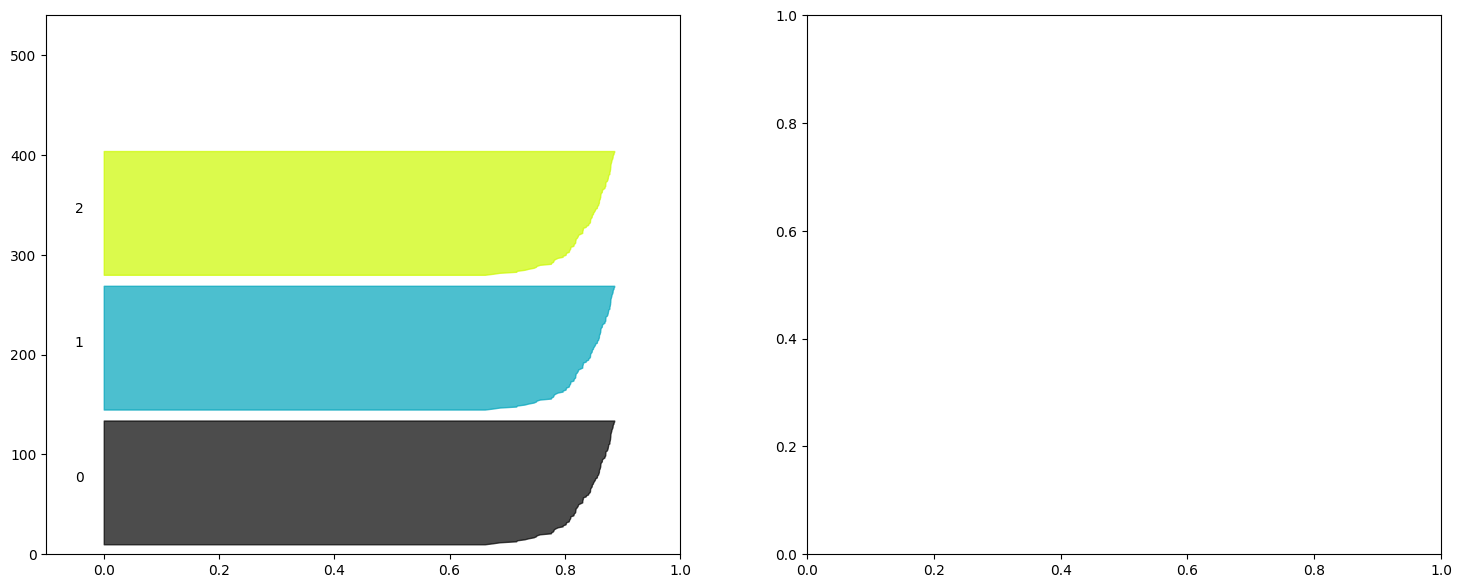

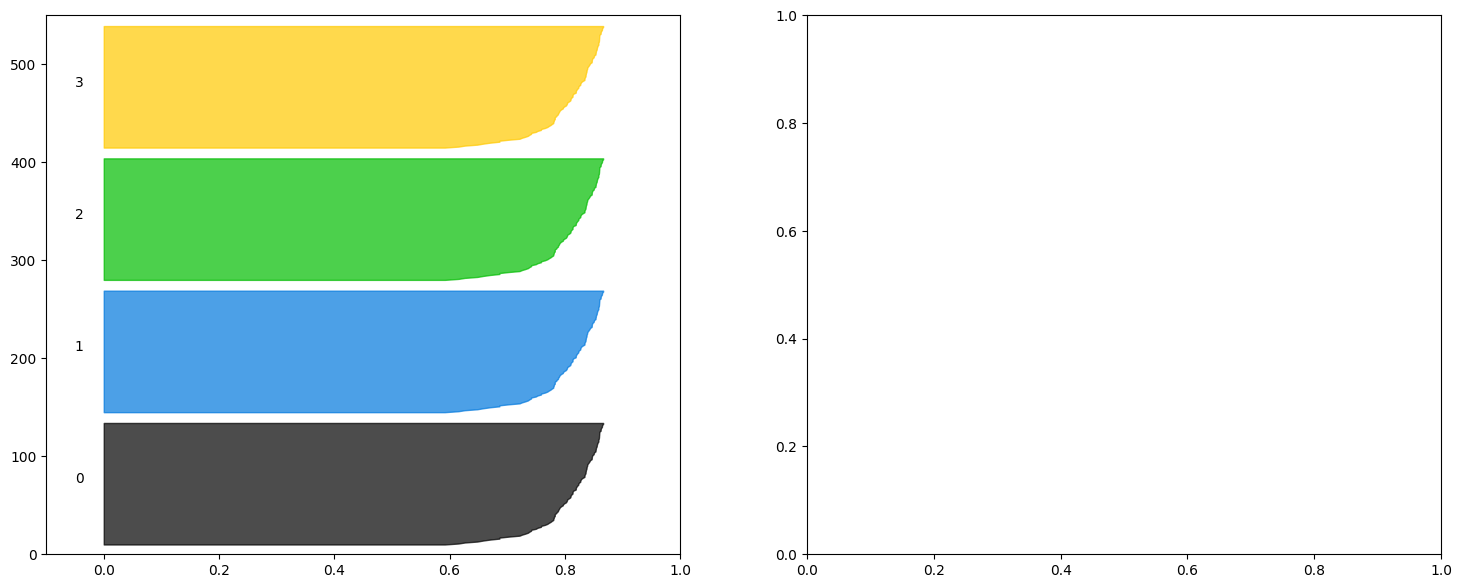

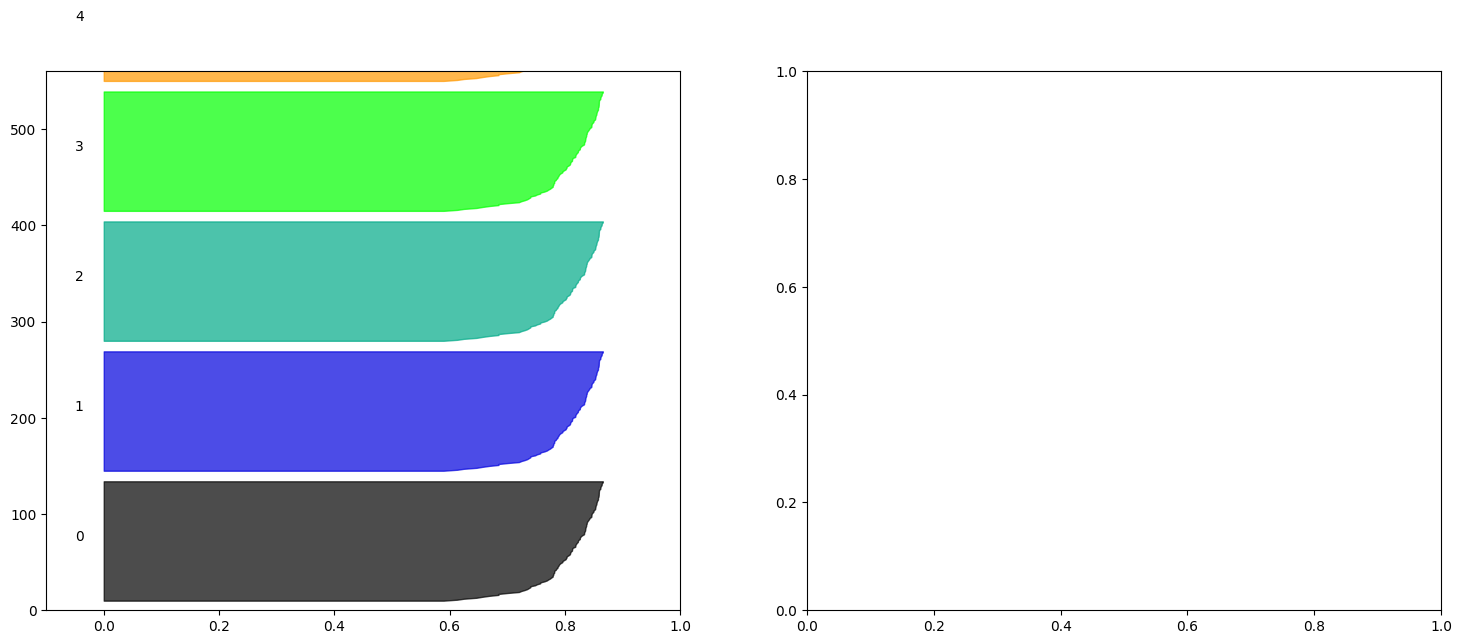

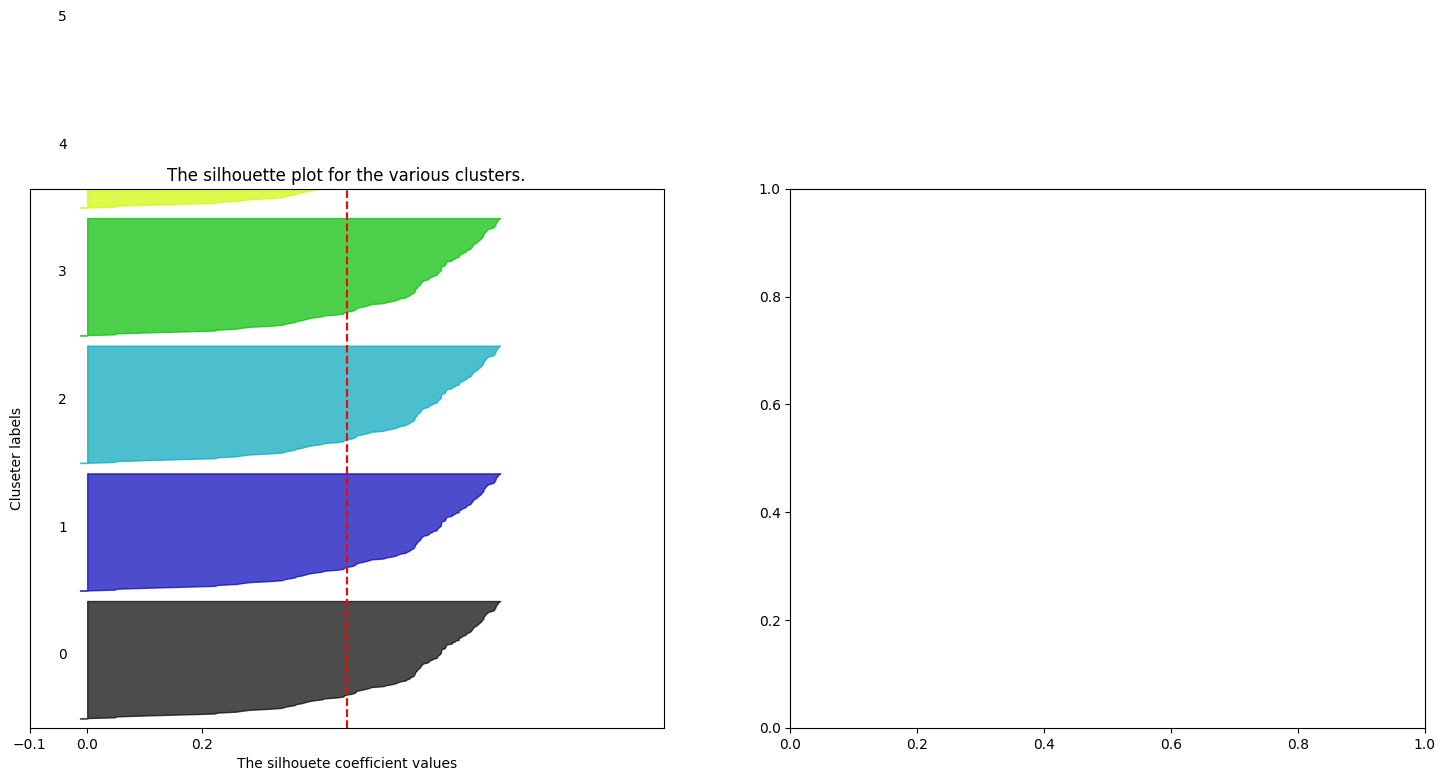

In [5]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
  # Create a subplot with 2 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])

  # The (n_clusters + 1)*10 is for inserting blank space between the
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(X) + (n_clusters + 1 ) * 10])


  clusterer = KMeans(n_clusters = n_clusters, random_state = 10)
  cluster_labels = clusterer.fit_predict(X)

  # Intialize the clusterer with n_clusters value and a random
  silhouette_avg = silhouette_score(X, cluster_labels)
  print(
      "For n_clusters = ",
      n_clusters,
      "The average silhouette_score is",
      silhouette_avg
  )

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X, cluster_labels)


  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for each samples belonging to cluster 1, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == 1]

    ith_cluster_silhouette_values.sort()

    size_cluster_i =ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor = color,
        edgecolor = color,
        alpha = 0.7
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower  + 0.5* size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouete coefficient values")
ax1.set_ylabel("Cluseter labels")

# The vertical lines for average silhouette score of all the values
ax1.axvline(x = silhouette_avg, color = "red", linestyle="--")

ax1.set_yticks([]) # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, ])
